<a href="https://colab.research.google.com/github/gatemediang/imdb-scraper/blob/main/Titanic_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from google.colab import files

uploaded = files.upload()  # Upload train.csv and test.csv from your local machine


Saving test.csv to test.csv
Saving train.csv to train.csv


In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**DATA CLEANING**

In [4]:
# DATA CLEANING -Check for missing values
train.info()
train.isnull().sum()

# Fill missing values
train['Age'].fillna(train['Age'].median(), inplace=True)
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)

# Drop columns if unnecessary
train.drop(['Cabin', 'Ticket'], axis=1, inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


/tmp/ipython-input-4163336247.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Age'].fillna(train['Age'].median(), inplace=True)
/tmp/ipython-input-4163336247.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

**Exploratory Data Analysis (EDA)**

In [5]:
train.describe()
train['Survived'].value_counts()


,count
Survived,
0,549
1,342


**Visualizations**

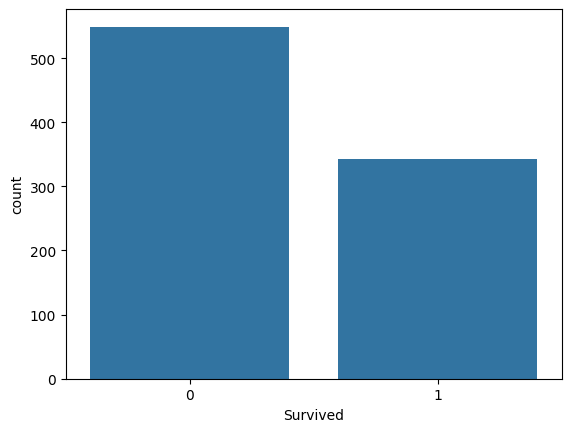

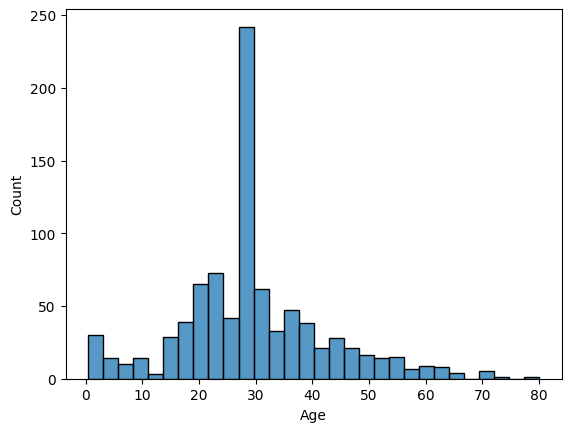

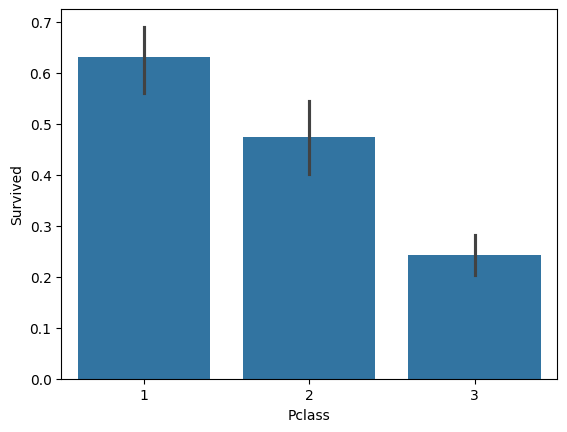

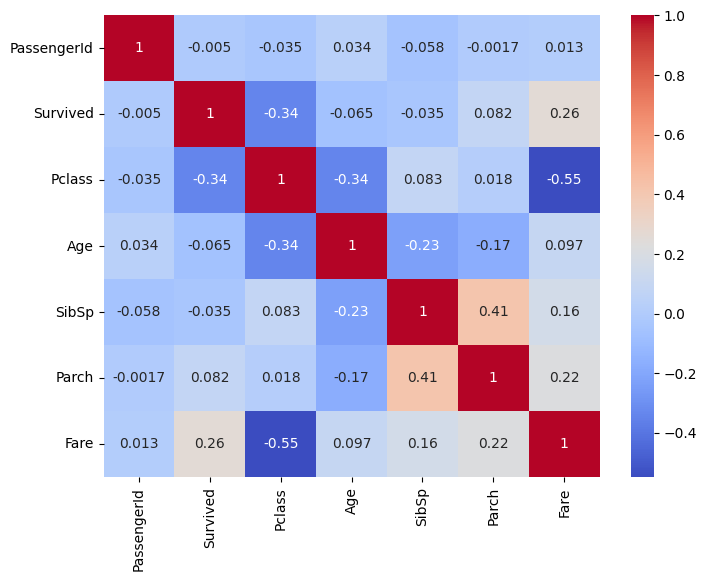

In [7]:
# Count of survivors
sns.countplot(x='Survived', data=train)
plt.show()

# Age distribution
sns.histplot(train['Age'], bins=30)
plt.show()

# Survival by Pclass
sns.barplot(x='Pclass', y='Survived', data=train)
plt.show()

# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(train.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm')
plt.show()

**Observations**

Passenger class has a strong correlation with survival.

Females had higher survival rates than males.

Age shows that younger passengers had slightly better survival.









Readme.md


# Titanic EDA

This repository contains a beginner-friendly EDA on the Titanic dataset from Kaggle.

## Key Findings

- Female passengers had higher survival rates than males.
- Higher-class passengers (1st class) survived more than lower classes.
- Age plays a role: children had slightly better survival chances.
- Embarked location shows slight differences in survival.

## Libraries Used
- pandas, numpy
- matplotlib, seaborn
- Google Colab
